In [ ]:
# Problem statement
# A less complex data from a copper industry is considered which is skewed and noisy. 
# This can affect making optimal predictions for the selling price and transaction status.
# The aim is to come up with a suitable ML model that is robust to this skewed and noisy data to make predictions
# for the above mentioned parameters. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading the copper dataset as a data frame
import pandas as pd
df_copper_data = pd.read_excel('Copper_Set.xlsx')

In [3]:
len(df_copper_data)

181673

In [4]:
df_copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
df_copper_data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
import numpy as np
df_copper_data['material_ref'] = df_copper_data.material_ref.replace(to_replace = r'^0000.*',value = np.nan, regex=True)


In [10]:
df_copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [11]:
df_copper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   81028 non-null   object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [19]:
# Since material_ref has many null values, we are replacing them by unknown
df_copper_data['material_ref'].fillna('unknown',inplace=True)

In [24]:
df_copper_data.isna().sum()

id                2
item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [30]:
# Some columns have incorrect datatype, we need to convert them to correct data type
# Quantity tons
df_copper_data['quantity tons'] = pd.to_numeric(df_copper_data['quantity tons'],errors='coerce')
# Item date
df_copper_data['item_date'] = pd.to_datetime(df_copper_data['item_date'],format='%Y%m%d',errors='coerce')
# Delivery date
df_copper_data['delivery date'] = pd.to_datetime(df_copper_data['delivery date'],format='%Y%m%d',errors='coerce')

In [32]:
df_copper_data['delivery date']

0        2021-07-01
1        2021-04-01
2        2021-01-01
3        2021-01-01
4        2021-03-01
            ...    
181668   2020-07-01
181669   2020-07-01
181670   2020-07-01
181671   2020-07-01
181672   2020-07-01
Name: delivery date, Length: 181673, dtype: datetime64[ns]

In [33]:
df_copper_data.isna().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [36]:
# As less than 1% of data attribute to the null values, we prefer to remove them
df_copper_data.dropna(inplace=True)

In [37]:
df_copper_data.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [38]:
df_copper_data.to_csv('Copper_data_up.csv',index=False)

In [2]:
import pandas as pd
df_copper_data = pd.read_csv('Copper_data_up.csv')
df_copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181626,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,unknown,164141591,2020-07-01,591.00
181627,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,unknown,164141591,2020-07-01,589.00
181628,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,unknown,164141591,2020-07-01,619.00
181629,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,unknown,164141591,2020-07-01,601.00


In [3]:
# Graphical plots to detect skewness and outliers
import seaborn as sns
import matplotlib.pyplot as plt
# Check the skewness for continuous variables - Quantity tons, thickness, width and selling price
df_copper_data[['quantity tons','thickness','width','selling_price']].skew(axis=0,numeric_only=True)

quantity tons    424.641723
thickness        303.471592
width              0.374845
selling_price    301.353247
dtype: float64

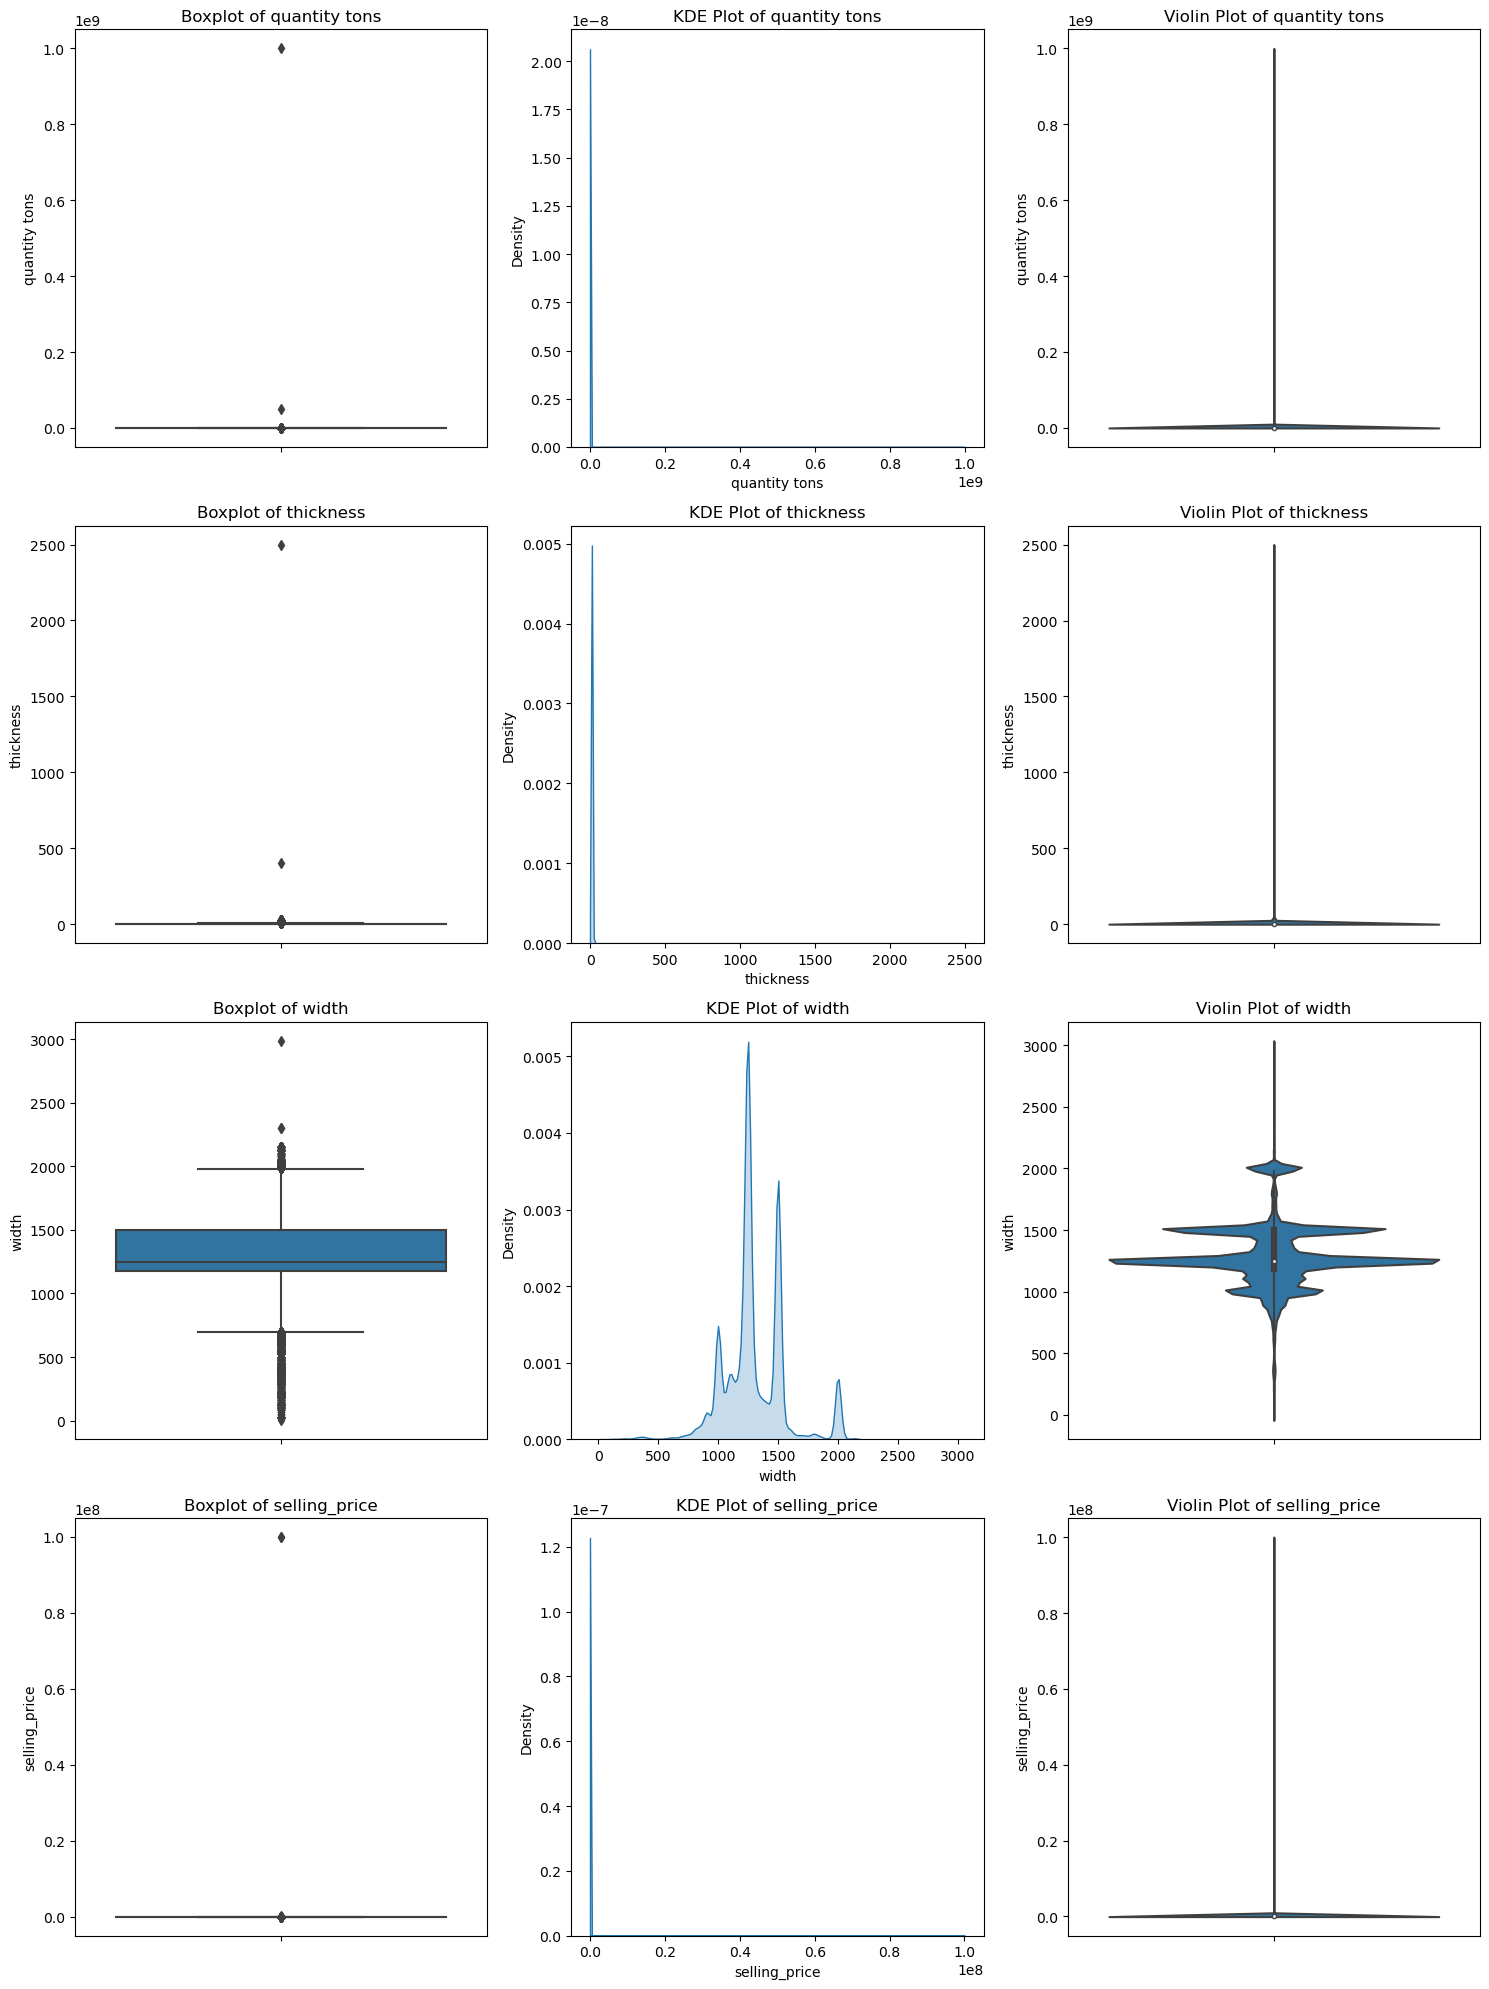

In [4]:
# Higher skew values suggest that quantity tons, thickness and selling price are highly skewed
# Visualising skewness and outliers
df_out = df_copper_data[['quantity tons','thickness','width','selling_price']]
# Create a grid with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
# Loop through each column and plot boxplot, kdeplot, and violinplot
for i, col in enumerate(df_out.columns):
    sns.boxplot(y=df_out[col], ax=axes[i, 0])
    sns.kdeplot(df_out[col], ax=axes[i, 1], fill=True)
    sns.violinplot(y=df_out[col], ax=axes[i, 2])

    # Set titles for the plots
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 1].set_title(f'KDE Plot of {col}')
    axes[i, 2].set_title(f'Violin Plot of {col}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [5]:
# Treating the outliers using IQR
# detecting outliers
import numpy as np
def iqr_outlier(Arr):
    q1 = np.percentile(Arr,25)
    q3 = np.percentile(Arr,75)
    iqr = q3-q1
    lb = q1-1.5*iqr
    ub = q3+1.5*iqr
    outliers = [x for x in Arr if x<lb or x>ub]
    return outliers

In [6]:
for x in df_out.columns:
    print(f'No. of outliers in {x}: {len(iqr_outlier(df_out[x]))}')

No. of outliers in quantity tons: 20950
No. of outliers in thickness: 13947
No. of outliers in width: 10948
No. of outliers in selling_price: 4858


In [7]:
A_x = [x for x in df_copper_data['selling_price'] if x<=0.1]
A_x

[-1160.0, 0.0, -730.0, -445.0, -25.0, 0.0, 0.1, -336.0]

In [8]:
m1 = df_out['quantity tons'] <= 0
outlierz = iqr_outlier(df_out['quantity tons'])
filterz = [x for x in df_out['quantity tons'] if x not in outlierz]
df_out.loc[m1,'quantity tons'] = np.mean(filterz)

In [9]:
m2 = df_out['selling_price'] <=0.1
outlierzz = iqr_outlier(df_out['selling_price'])
filter_lis = [x for x in df_out['selling_price'] if x not in outlierzz]
df_out.loc[m2,'selling_price'] = np.mean(filter_lis)

In [15]:
df_out['id'] = df_copper_data['id']

In [10]:
df_out1 = df_copper_data[['id','quantity tons','thickness','width','selling_price']]
df_out1

,id,quantity tons,thickness,width,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,2.00,1500.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,0.80,1210.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,0.38,952.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,202.411065,2.30,1317.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,785.526262,4.00,2000.0,577.00
...,...,...,...,...,...
181626,DE633116-D1DF-4846-982E-55EFC3658A76,102.482422,0.96,1220.0,591.00
181627,A48374B1-E6DB-45F2-889A-1F9C27C099EB,208.086469,0.95,1500.0,589.00
181628,91643238-5C7B-4237-9A5F-63AE3D35F320,4.235594,0.71,1250.0,619.00
181629,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,-2000.000000,0.85,1250.0,601.00


In [11]:
m11 = df_out1['quantity tons'] <= 0
df_out1.loc[m11,'quantity tons'] = np.nan

In [12]:
m21 = df_out1['selling_price'] <= 0.1
df_out1.loc[m21,'selling_price'] = np.nan

In [13]:
df_out.isna().sum()

quantity tons    0
thickness        0
width            0
selling_price    0
dtype: int64

In [14]:
df_out1.isna().sum()

id               0
quantity tons    4
thickness        0
width            0
selling_price    8
dtype: int64

In [15]:
df_out1.dropna(inplace=True)

In [16]:
df_out1

,id,quantity tons,thickness,width,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,2.00,1500.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,0.80,1210.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,0.38,952.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,202.411065,2.30,1317.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,785.526262,4.00,2000.0,577.00
...,...,...,...,...,...
181625,0B812591-B501-4F34-859A-B06381FAEB44,106.783299,0.96,1240.0,602.00
181626,DE633116-D1DF-4846-982E-55EFC3658A76,102.482422,0.96,1220.0,591.00
181627,A48374B1-E6DB-45F2-889A-1F9C27C099EB,208.086469,0.95,1500.0,589.00
181628,91643238-5C7B-4237-9A5F-63AE3D35F320,4.235594,0.71,1250.0,619.00


In [17]:
# Applying logarithmic transformation to the columns with highly skewed data
df_out['quantity tons'] = np.log(df_out['quantity tons'])
df_out['thickness'] = np.log(df_out['thickness'])
df_out['selling_price'] = np.log(df_out['selling_price'])

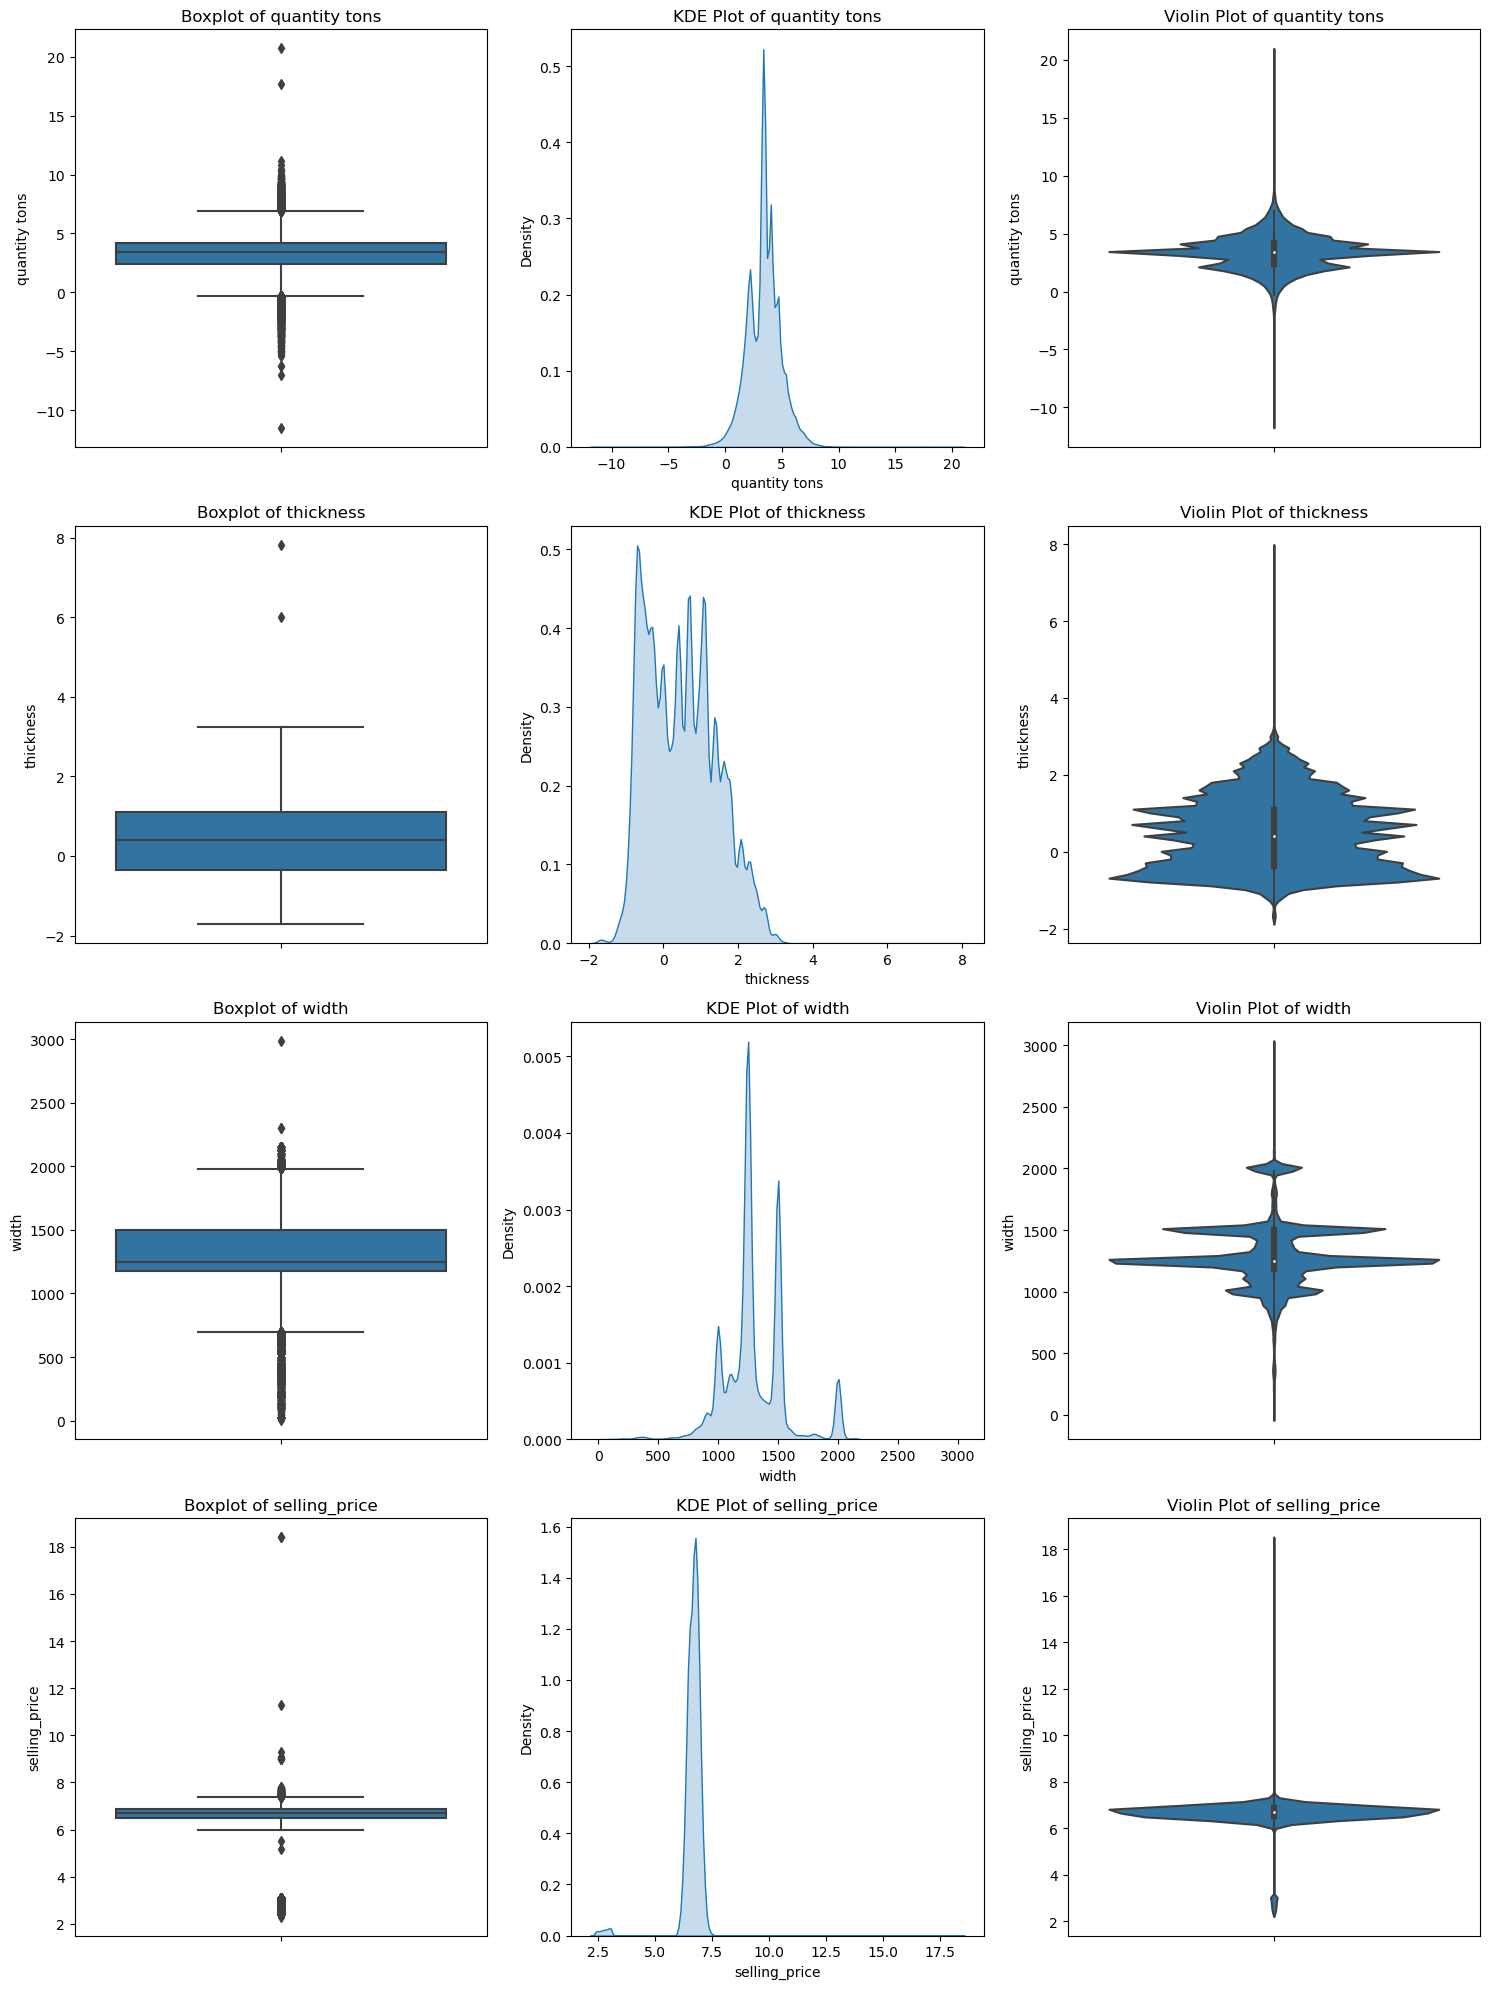

In [18]:
# Visualizing the data after transformation
# Create a grid with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
# Loop through each column and plot boxplot, kdeplot, and violinplot
for i, col in enumerate(df_out.columns):
    if col!='id':
        sns.boxplot(y=df_out[col], ax=axes[i, 0])
        sns.kdeplot(df_out[col], ax=axes[i, 1], fill=True)
        sns.violinplot(y=df_out[col], ax=axes[i, 2])

        # Set titles for the plots
        axes[i, 0].set_title(f'Boxplot of {col}')
        axes[i, 1].set_title(f'KDE Plot of {col}')
        axes[i, 2].set_title(f'Violin Plot of {col}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:
# Applying logarithmic transformation to the columns with highly skewed data
df_out1['quantity tons'] = np.log(df_out1['quantity tons'])
df_out1['thickness'] = np.log(df_out1['thickness'])
df_out1['selling_price'] = np.log(df_out1['selling_price'])

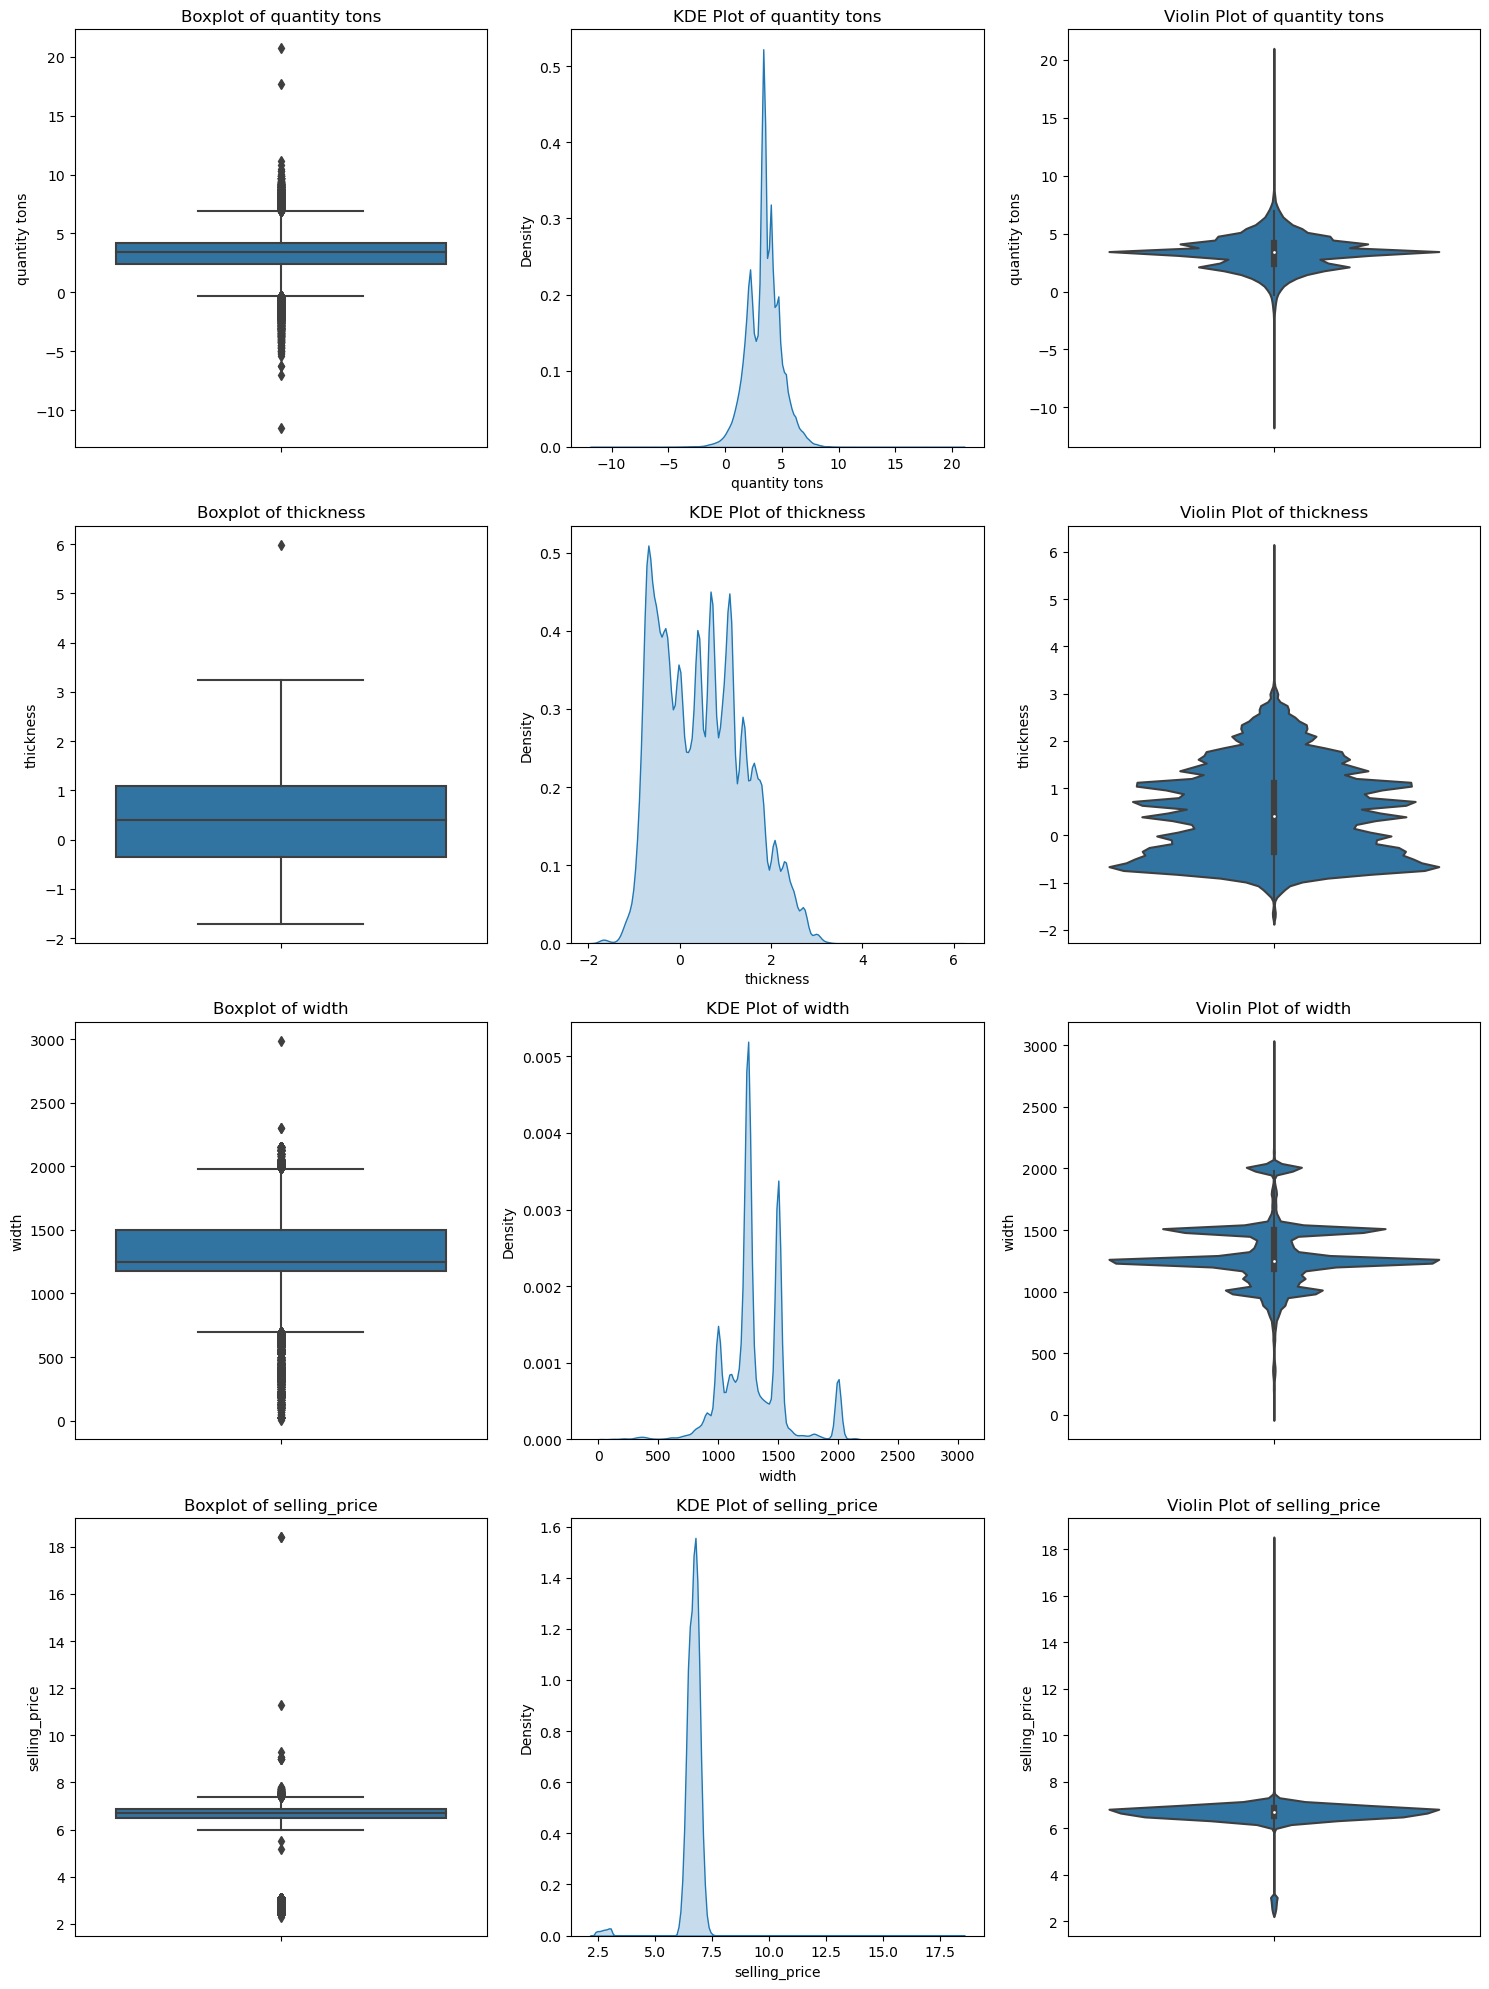

In [20]:
# Visualizing the data after transformation
# Create a grid with 4 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
# Loop through each column and plot boxplot, kdeplot, and violinplot
df_cols = list(df_out1.columns)
df_cols.remove('id')
for i, col in enumerate(df_cols):
    sns.boxplot(y=df_out1[col], ax=axes[i, 0])
    sns.kdeplot(df_out1[col], ax=axes[i, 1], fill=True)
    sns.violinplot(y=df_out1[col], ax=axes[i, 2])

    # Set titles for the plots
    axes[i, 0].set_title(f'Boxplot of {col}')
    axes[i, 1].set_title(f'KDE Plot of {col}')
    axes[i, 2].set_title(f'Violin Plot of {col}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [31]:
# We see that columns of df_out and df_out1 have similar plots. 
# One can either consider df_out or df_out1 for the rest on the analysis

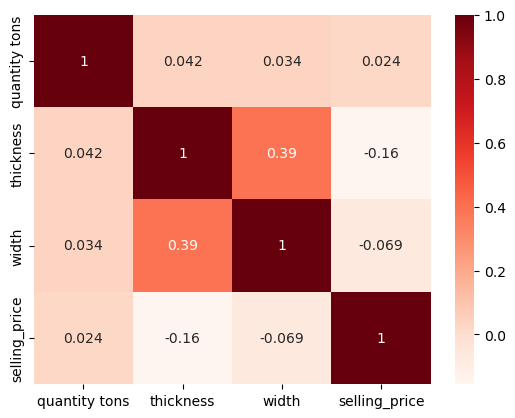

In [21]:
# To check if feature engineering can be applied - 
# aggregating or transforming existing features to create more informative representations of the data.
# Check for highly correlated columns in the data
corr_matrix = df_out1[['quantity tons','thickness','width','selling_price']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.show()

In [33]:
# correlation values are comparatively small which means that the columns are not highy correlated
# So we can proceed with these columns

In [54]:
df_categ = df_copper_data[['id','status','item type','item_date','delivery date','customer','country','application','product_ref']]
df_categ.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [55]:
df_categ['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [56]:
df_copper_ml = df_categ.merge(df_out1,how='inner',on='id')
df_copper_ml

,id,status,item type,item_date,delivery date,customer,country,application,product_ref,quantity tons,thickness,width,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,Won,W,2021-04-01,2021-07-01,30156308.0,28.0,10.0,1670798778,3.991779,0.693147,1500.0,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,Won,W,2021-04-01,2021-04-01,30202938.0,25.0,41.0,1668701718,6.643822,-0.223144,1210.0,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,Won,WI,2021-04-01,2021-01-01,30153963.0,30.0,28.0,628377,5.956169,-0.967584,952.0,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,Won,S,2021-04-01,2021-01-01,30349574.0,32.0,59.0,1668701718,5.310301,0.832909,1317.0,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,Won,W,2021-04-01,2021-03-01,30211560.0,28.0,10.0,640665,6.666354,1.386294,2000.0,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,Won,W,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.670802,-0.040822,1240.0,6.400257
181615,DE633116-D1DF-4846-982E-55EFC3658A76,Won,W,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.629691,-0.040822,1220.0,6.381816
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,Won,W,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,5.337954,-0.051293,1500.0,6.378426
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,Won,W,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,1.443523,-0.342490,1250.0,6.428105


In [57]:
# Saving the data
df_copper_ml.to_csv('Copper_regress.csv',index=False)

In [58]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
label_encode = LabelEncoder()
encoded_item = label_encode.fit_transform(df_copper_ml['item type'])
df_copper_ml['item type'] = encoded_item

In [59]:
X = label_encode.transform(['S'])
X

array([3])

In [61]:
df_copper_ml['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [62]:
ordinal_encode = OrdinalEncoder(categories='auto')
encoded_status = ordinal_encode.fit_transform(df_copper_ml[['status']])
df_copper_ml['status'] = encoded_status

In [63]:
df_copper_ml.status.unique()

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [64]:
# Regression model for selling price 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
X = df_copper_ml[['status','item type','customer','country','application','product_ref','quantity tons','thickness','width']]
Y = df_copper_ml['selling_price']
# Normalization
scale = StandardScaler()
X = scale.fit_transform(X.values)
# Splitting the data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Define the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider at each split
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Use the best model to predict on the test data
best_rf = grid_search.best_estimator_
Y_pred = best_rf.predict(X_test)

# Evaluate the final model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
print(f"R2 Score: {r2}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (Negative MSE): -0.023046023927880088
Mean Squared Error on Test Data: 0.019867565698417033
R2 Score: 0.9372939868140095


In [65]:
#Given the values, using the model to predict the selling price
X_new = np.array([['Won','S',30153963.0,30.0,28.0,628377,np.log(300),np.log(2),800.0]])
X_new[:,[1]]=label_encode.transform(np.ravel(X_new[:,[1]]))
X_new[:,[0]]=ordinal_encode.transform(X_new[:,[0]])
X_new = scale.transform(X_new)
y_pred = best_rf.predict(X_new)
print(f'Predicted Selling Price:${np.around(np.exp(y_pred[0]),decimals=2)}')

Predicted Selling Price:$736.08


In [66]:
# Pickling to save the models
import pickle
with open('rf_reg.pkl','wb') as reg_file:
    pickle.dump(best_rf,reg_file)
with open('scale.pkl','wb') as scale_f:
    pickle.dump(scale,scale_f)
with open('label_encode_fl.pkl','wb') as lb_enc_f:
    pickle.dump(label_encode,lb_enc_f)
with open('ordinal_encode_fl.pkl','wb') as or_enc_f:
    pickle.dump(ordinal_encode,or_enc_f)

In [67]:
# Classification task for 'Status'
df_copper_class = df_copper_ml.copy()

In [68]:
del df_copper_class['status']
del df_copper_class['item type']
df_copper_class

,id,item_date,delivery date,customer,country,application,product_ref,quantity tons,thickness,width,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,2021-07-01,30156308.0,28.0,10.0,1670798778,3.991779,0.693147,1500.0,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2021-04-01,30202938.0,25.0,41.0,1668701718,6.643822,-0.223144,1210.0,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,2021-01-01,30153963.0,30.0,28.0,628377,5.956169,-0.967584,952.0,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,2021-01-01,30349574.0,32.0,59.0,1668701718,5.310301,0.832909,1317.0,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2021-03-01,30211560.0,28.0,10.0,640665,6.666354,1.386294,2000.0,6.357842
...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.670802,-0.040822,1240.0,6.400257
181615,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.629691,-0.040822,1220.0,6.381816
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,5.337954,-0.051293,1500.0,6.378426
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,1.443523,-0.342490,1250.0,6.428105


In [69]:
df_copy = df_copper_data[['id','status','item type']]
df_copper_classy = df_copper_class.merge(df_copy,how='inner',on='id')
df_copper_classy

,id,item_date,delivery date,customer,country,application,product_ref,quantity tons,thickness,width,selling_price,status,item type
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,2021-07-01,30156308.0,28.0,10.0,1670798778,3.991779,0.693147,1500.0,6.749931,Won,W
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2021-04-01,30202938.0,25.0,41.0,1668701718,6.643822,-0.223144,1210.0,6.953684,Won,W
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,2021-01-01,30153963.0,30.0,28.0,628377,5.956169,-0.967584,952.0,6.468211,Won,WI
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,2021-01-01,30349574.0,32.0,59.0,1668701718,5.310301,0.832909,1317.0,6.643790,Won,S
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2021-03-01,30211560.0,28.0,10.0,640665,6.666354,1.386294,2000.0,6.357842,Won,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.670802,-0.040822,1240.0,6.400257,Won,W
181615,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.629691,-0.040822,1220.0,6.381816,Won,W
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,5.337954,-0.051293,1500.0,6.378426,Won,W
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,1.443523,-0.342490,1250.0,6.428105,Won,W


In [70]:
df_copper_classy_up = df_copper_classy[df_copper_classy.status.isin(['Won','Lost'])]

In [71]:
df_copper_classy_up

,id,item_date,delivery date,customer,country,application,product_ref,quantity tons,thickness,width,selling_price,status,item type
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,2021-07-01,30156308.0,28.0,10.0,1670798778,3.991779,0.693147,1500.0,6.749931,Won,W
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2021-04-01,30202938.0,25.0,41.0,1668701718,6.643822,-0.223144,1210.0,6.953684,Won,W
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,2021-01-01,30153963.0,30.0,28.0,628377,5.956169,-0.967584,952.0,6.468211,Won,WI
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,2021-01-01,30349574.0,32.0,59.0,1668701718,5.310301,0.832909,1317.0,6.643790,Won,S
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2021-03-01,30211560.0,28.0,10.0,640665,6.666354,1.386294,2000.0,6.357842,Won,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.670802,-0.040822,1240.0,6.400257,Won,W
181615,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.629691,-0.040822,1220.0,6.381816,Won,W
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,5.337954,-0.051293,1500.0,6.378426,Won,W
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,1.443523,-0.342490,1250.0,6.428105,Won,W


In [72]:
# Saving the data
df_copper_classy_up.to_csv('Copper_class.csv',index=False)

In [73]:
# Find the 'Won':'Lost' ratio
won = df_copper_classy_up[['status']][df_copper_classy_up.status=='Won'].count()
won = won['status']
tot = len(df_copper_classy_up)
lost = tot-won
round(won/lost,2)

3.37

In [ ]:
# We see that the ratio is close to 3. This means that if we consider this dataset, there are greater chances that the
# prediction will be 'Won'. So, we need to resample the dataset such that the ratio is closer to 1

In [74]:
# Before resampling, let's encode the status and item type
encode_item_1 = label_encode.fit_transform(df_copper_classy_up['item type'])
df_copper_classy_up['item type'] = encode_item_1
encoded_status_1 = ordinal_encode.fit_transform(df_copper_classy_up[['status']])
df_copper_classy_up['status'] = encoded_status_1

In [78]:
df_copper_classy_up

,id,item_date,delivery date,customer,country,application,product_ref,quantity tons,thickness,width,selling_price,status,item type
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,2021-07-01,30156308.0,28.0,10.0,1670798778,3.991779,0.693147,1500.0,6.749931,1.0,5
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,2021-04-01,30202938.0,25.0,41.0,1668701718,6.643822,-0.223144,1210.0,6.953684,1.0,5
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,2021-01-01,30153963.0,30.0,28.0,628377,5.956169,-0.967584,952.0,6.468211,1.0,6
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,2021-01-01,30349574.0,32.0,59.0,1668701718,5.310301,0.832909,1317.0,6.643790,1.0,3
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,2021-03-01,30211560.0,28.0,10.0,640665,6.666354,1.386294,2000.0,6.357842,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181614,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.670802,-0.040822,1240.0,6.400257,1.0,5
181615,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,4.629691,-0.040822,1220.0,6.381816,1.0,5
181616,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,5.337954,-0.051293,1500.0,6.378426,1.0,5
181617,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,2020-07-01,30200854.0,25.0,41.0,164141591,1.443523,-0.342490,1250.0,6.428105,1.0,5


In [79]:
# Resample 
from collections import Counter
from imblearn.combine import SMOTEENN
X = df_copper_classy_up[['customer','country','application','product_ref','quantity tons','thickness','width','selling_price','item type']]
Y = df_copper_classy_up['status']
print(f'Original: {dict(Counter(Y))}')
smooth = SMOTEENN(random_state=42)
X_samp,Y_samp = smooth.fit_resample(X,Y)
print(f'Resampled: {dict(Counter(Y_samp))}')

Original: {1.0: 115995, 0.0: 34431}
Resampled: {0.0: 98679, 1.0: 97483}


In [80]:
# The ratio of loss:won is close to 1 
round(98679/97483,2)

1.01

In [89]:
# Proceed to classification
# Logistic Regression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
x = X_samp
y = Y_samp

#Normalize the data
scale = StandardScaler()
x = scale.fit_transform(x.values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of regularization (l1 or l2)
    'solver': ['liblinear', 'saga']  # Solver algorithms compatible with l1 and l2 penalties
}
# Create GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.7133417075308521
Test Accuracy: 0.7125379145107436


              precision    recall  f1-score   support

         0.0       0.70      0.73      0.72     19628
         1.0       0.72      0.69      0.71     19605

    accuracy                           0.71     39233
   macro avg       0.71      0.71      0.71     39233
weighted avg       0.71      0.71      0.71     39233



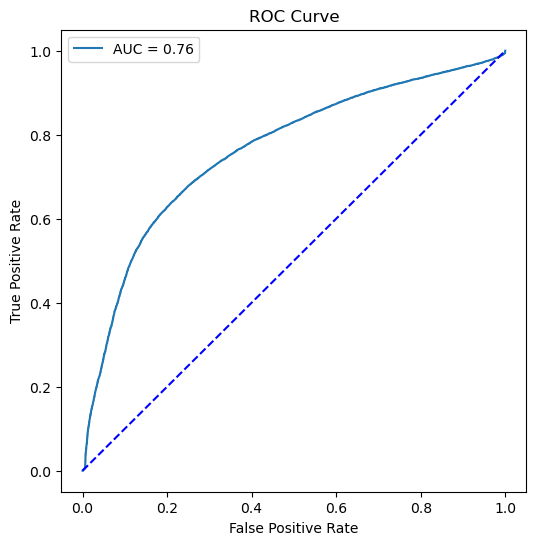

In [90]:
y_pred = best_model.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
y_pred_prob = best_model.predict_proba(x_test)[:,1]
# AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [92]:
# Extra trees classifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
x = X_samp
y = Y_samp

#Normalize the data
scale = StandardScaler()
x = scale.fit_transform(x.values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Defining ExtraTreesClassifier
extra_tc = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=extra_tc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on the test set using the best model
best_etc = grid_search.best_estimator_
test_accuracy = best_etc.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9899126252128561
Test Accuracy: 0.9920984885173196


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19628
         1.0       1.00      0.99      0.99     19605

    accuracy                           0.99     39233
   macro avg       0.99      0.99      0.99     39233
weighted avg       0.99      0.99      0.99     39233



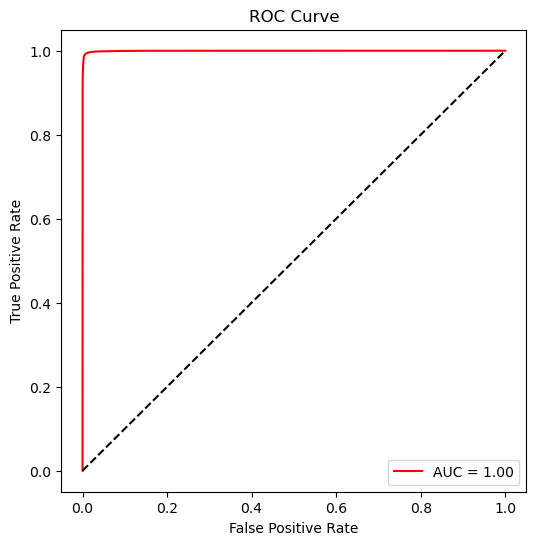

In [94]:
y_pred = best_etc.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)
y_pred_prob = best_etc.predict_proba(x_test)[:,1]
# AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}',color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [115]:
# Predict the status based on the given values
#X = df_copper_classy_up[['customer','country','application','product_ref','quantity tons','thickness','width','selling_price','item type']]
X_val = np.array([[30153963.0,30.0,28.0,628377,np.log(300),np.log(2),800.0,np.log(700),'S']])
X_val[:,[-1]]=label_encode.transform(np.ravel(X_val[:,[-1]]))
X_val = scale.transform(X_val)
y_pred_val = best_etc.predict(X_val)
if y_pred_val == 1:
    print("Status: Won")
else:
    print("Status: Lost")

Status: Won


In [116]:
# ExtraTreesClassifier gives a very good accuracy of 99%. So we proceed with this model
# pickle to save the model
import pickle
with open('classfy_model.pkl','wb') as class_fl:
    pickle.dump(best_etc,class_fl)